In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical ,pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import f1_score, accuracy_score
import nltk
nltk.download('stopwords')
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import sys
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
maxlen = 200
# Load the train.csv file
train_df = pd.read_csv('train.csv')

# Preprocess the text in the train.csv file

sys.setrecursionlimit(100000)

stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords and perform stemming
    text = [ps.stem(word) for word in text.split() if word not in stopwords]
    # Join the words back into a single string
    text = ' '.join(text)
    return text

In [ ]:
train_df['comment_text'] = train_df['comment_text'].apply(clean_text)

# Tokenize the text and convert the labels to one-hot encoding
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_df['comment_text'])
X = tokenizer.texts_to_sequences(train_df['comment_text'])
X = pad_sequences(X, maxlen=maxlen)
Y = train_df.iloc[:, 2:].values


# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(max_features, 128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data       
history  = model.fit(X, Y, epochs=8, batch_size=1024, validation_split=0.1)

Epoch 1/8
141/141 [==============================] - 158s 1s/step - loss: 0.1696 - accuracy: 0.9377 - val_loss: 0.0984 - val_accuracy: 0.9837
Epoch 2/8
141/141 [==============================] - 145s 1s/step - loss: 0.0797 - accuracy: 0.9755 - val_loss: 0.0649 - val_accuracy: 0.9915
Epoch 3/8
141/141 [==============================] - 141s 1s/step - loss: 0.0549 - accuracy: 0.9940 - val_loss: 0.0563 - val_accuracy: 0.9940
Epoch 4/8
141/141 [==============================] - 136s 958ms/step - loss: 0.0490 - accuracy: 0.9942 - val_loss: 0.0554 - val_accuracy: 0.9940
Epoch 5/8
141/141 [==============================] - 141s 1s/step - loss: 0.0452 - accuracy: 0.9942 - val_loss: 0.0532 - val_accuracy: 0.9940
Epoch 6/8
141/141 [==============================] - 135s 956ms/step - loss: 0.0459 - accuracy: 0.9941 - val_loss: 0.0542 - val_accuracy: 0.9939
Epoch 7/8
141/141 [==============================] - 134s 948ms/step - loss: 0.0422 - accuracy: 0.9942 - val_loss: 0.0545 - val_accuracy: 0.99

In [ ]:
score = model.evaluate(X, Y, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

4987/4987 [==============================] - 329s 66ms/step - loss: 0.0401 - accuracy: 0.9927
Test Score: 0.04008529335260391
Test Accuracy: 0.9927304983139038


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 2,692,358
Trainable params: 2,692,358
Non-trainable params: 0
_________________________________________________________________
None


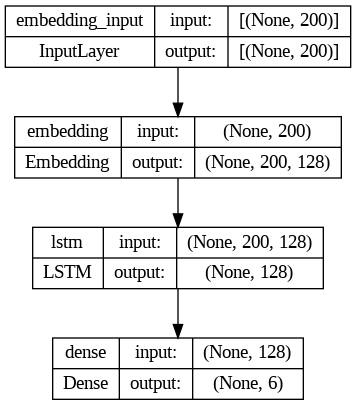

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

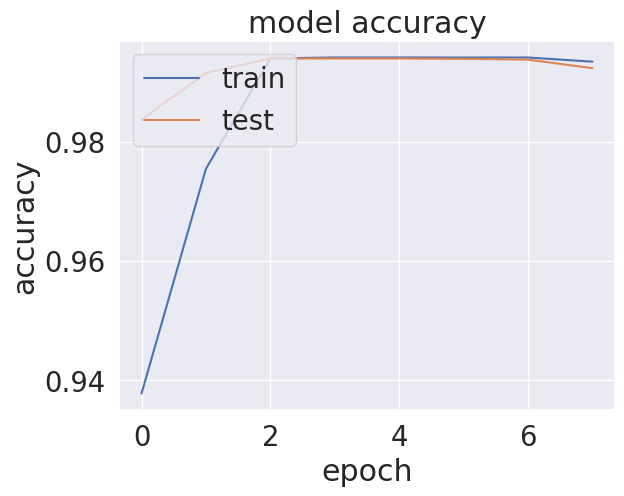

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


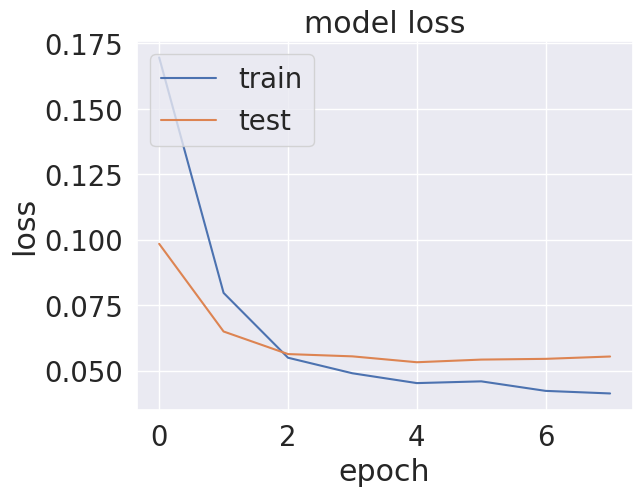

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import files
import io
 
# Ask the user to input either a test.csv file or a list of comments
input_type = input("Enter 'comments' to input a list of comments: ")

if input_type == "file":
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    # Load the test.csv file
    test_df = pd.read_csv(io.BytesIO(uploaded[filename]))
    
    # Preprocess the text in the test.csv file
    test_df['comment_text'] = test_df['comment_text'].apply(clean_text)
    
    # Tokenize the text and predict the labels for each comment
    X_test = tokenizer.texts_to_sequences(test_df['comment_text'])
    X_test = pad_sequences(X_test, maxlen=maxlen)
    Y_test_pred = model.predict(X_test)

elif input_type == "comments":
    # Ask the user to input a list of comments
    comments = input("Enter a list of comments (separated by commas): ")
    comments_list = comments.split(",")
    
    # Preprocess the text in the comments
    cleaned_comments = [clean_text(comment) for comment in comments_list]
    
    # Tokenize the text and predict the labels for each comment
    X_test = tokenizer.texts_to_sequences(cleaned_comments)
    X_test = pad_sequences(X_test, maxlen=maxlen)
    Y_test_pred = model.predict(X_test)

else:
    print("Invalid input type.")

Enter 'comments' to input a list of comments: comments
Enter a list of comments (separated by commas): This idiot can't even use proper grammar when hijacking a page,==Who the hell needs citations to verify that this album is going to be heavy metal?==   Is it not fucking obvious by the band's name that they are metal already? What the fuck kind of retard needs a citation for this album being heavy metal? Damn some people really are anal on wikipedia, demanding citations for fucking asinine, self evident things. Its so stupid.
1/1 [==============================] - 0s 69ms/step


In [ ]:
Y_test_pred_binary = (Y_test_pred > 0.5).astype(int)

    # Create a new DataFrame with the predicted labels
Y_test_pred_df = pd.DataFrame(Y_test_pred_binary, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
if input_type == "file":
  # Convert the predicted labels to binary (0 or 1)
    

    # If input_type was 'file', save the predicted labels to a CSV file
    test_id_df = test_df['id']
    test_result_df = pd.concat([test_id_df, Y_test_pred_df], axis=1)
    test_result_df.to_csv('test_result.csv', index=False)
else:
    # Otherwise, print the predicted labels for the input comments
    for i, comment in enumerate(comments_list):
        print("Comment:", comment)
        print("Predicted labels:", Y_test_pred_df.iloc[i])
        print()


Comment: This idiot can't even use proper grammar when hijacking a page
Predicted labels: toxic            1
severe_toxic     0
obscene          1
threat           0
insult           1
identity_hate    0
Name: 0, dtype: int64

Comment: ==Who the hell needs citations to verify that this album is going to be heavy metal?==   Is it not fucking obvious by the band's name that they are metal already? What the fuck kind of retard needs a citation for this album being heavy metal? Damn some people really are anal on wikipedia
Predicted labels: toxic            1
severe_toxic     0
obscene          1
threat           0
insult           1
identity_hate    0
Name: 1, dtype: int64

Comment:  demanding citations for fucking asinine
Predicted labels: toxic            1
severe_toxic     0
obscene          1
threat           0
insult           1
identity_hate    0
Name: 2, dtype: int64

Comment:  self evident things. Its so stupid.
Predicted labels: toxic            1
severe_toxic     0
obscene      

In [ ]:
from flask import Flask, render_template, request
import pandas as pd
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok
import io

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    flag = True
    # Get the selected input type and input data
    input_type = request.form.get('input_type')
    if input_type == 'file':
        # Load the test.csv file
        file = request.files['file']
        test_df = pd.read_csv(io.StringIO(file.read().decode('utf-8')))
        # Preprocess the text in the test.csv file
        test_df['comment_text'] = test_df['comment_text'].apply(clean_text)
    
        # Tokenize the text and predict the labels for each comment
        X_test = tokenizer.texts_to_sequences(test_df['comment_text'])
        X_test = pad_sequences(X_test, maxlen=maxlen)
        Y_test_pred = model.predict(X_test)
        Y_test_pred_binary = (Y_test_pred > 0.5).astype(int)

        # Create a new DataFrame with the predicted labels
        Y_test_pred_df = pd.DataFrame(Y_test_pred_binary, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

        # If input_type was 'file', save the predicted labels to a CSV file
        test_id_df = test_df['id']
        test_result_df = pd.concat([test_id_df, Y_test_pred_df], axis=1)
        test_result_df.to_csv('test_result.csv', index=False)
        data_raw = pd.read_csv('test_result.csv')
        categories = list(data_raw.columns.values)
        categories = categories[1:]
        print(categories)

        # Set plot style and font size
        sns.set_style("whitegrid")
        sns.set(font_scale = 1.5)

        # Create plot figure and axis object
        fig, ax = plt.subplots(figsize=(12,6))

        # Create bar plot
        a = sns.barplot(x=categories, y=data_raw.iloc[:,1:].sum().values,palette="rocket")

        # Set plot title and axis labels
        ax.set_title("Comments in each category", fontsize=22)
        ax.set_ylabel('Total number of comments', fontsize=18)
        ax.set_xlabel('Category', fontsize=18)

        # Add labels to the top of the bars
        rects = a.patches
        labels = data_raw.iloc[:,2:].sum().values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)

        # Adjust spacing between subplots and save figure
        plt.tight_layout()
        plt.savefig('/content/static/images/category_counts.png')

        rowSums = data_raw.iloc[:,2:].sum(axis=1)
        multipleLabel_counts = rowSums.value_counts()
        multipleLabel_counts = multipleLabel_counts.iloc[1:]

        # Set the color palette and font size
        sns.set_style("whitegrid")
        sns.set_palette("Set2")
        sns.set(font_scale=1.8)

        # Create a bar plot of the multiple label counts
        plt.figure(figsize=(12, 9))
        ax = sns.barplot(x=multipleLabel_counts.index, y=multipleLabel_counts.values)

        # Set the title and axis labels
        plt.title("Number of Comments with Multiple Labels", fontsize=15)
        plt.ylabel("Number of Comments", fontsize=18)
        plt.xlabel("Number of Labels", fontsize=18)

        # Add the count and percentage labels above the bars
        rects = ax.patches
        labels = multipleLabel_counts.values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2, height + 5, f"{label}\n({label/multipleLabel_counts.sum()*100:.1f}%)", ha='center', va='bottom', fontsize=14)

        # Add horizontal grid lines and a horizontal line at y=0
        ax.yaxis.grid(True)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1)

        # Remove the top and right spines
        sns.despine(top=True, right=True)
        plt.savefig('/content/static/images/multiple_label_counts.png')

    return render_template('index.html', image1='/static/images/category_counts.png', image2='/static/images/multiple_label_counts.png')
    
    

if __name__ == '__main__':
    app.run()